In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

from sklearn.decomposition import PCA
from scipy.stats import zscore

### Read the dataset

In [2]:
data_vehicle=pd.read_csv("vehicle (2).csv")
data_vehicle.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

# Exploratory Data Analysis

In [3]:
data_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [4]:
data_vehicle.shape

(846, 19)

In [5]:
data_vehicle.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [6]:
data_vehicle.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

As per the above query, we see that there are multiple null value on respective column. Therefore, we need to take care of the null values

In [7]:
data_vehicle_new=data_vehicle

##### Fixing N/A values

In [8]:
data_vehicle_new.fillna(data_vehicle_new.median(), axis=0, inplace=True)

### Checking back again the columns. After fixing na values

In [9]:
data_vehicle_new.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

After fixing the na values, all the missing values are fixed now.

#### Five point summary

In [10]:
data_vehicle_new.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

# Analysis of each column with the help of plots and checking Distribution with Skewness 

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


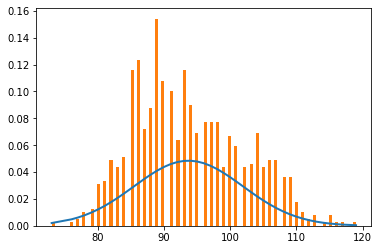

Skew = 0.38127063263996497


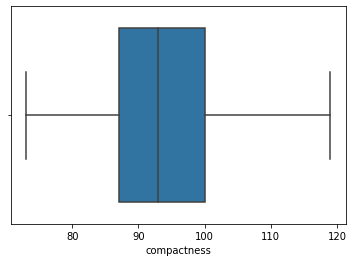

In [11]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['compactness'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['compactness'].skew())
sns.boxplot(data_vehicle_new['compactness'])

From the above figures, we see that there are no outliers in compactness column and as per the skewness value, the distribution is approximately symmetric.

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


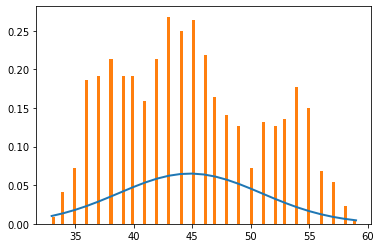

Skew = 0.2649279874901165


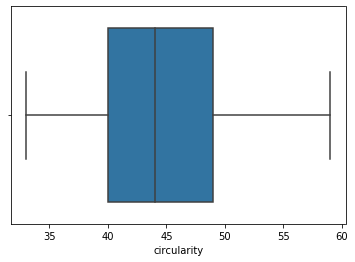

In [12]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['circularity'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['circularity'].skew())
sns.boxplot(data_vehicle_new['circularity'])

From the above figures, we see that there are no outliers in circularity column.

Skewness is approimately symmetric.

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


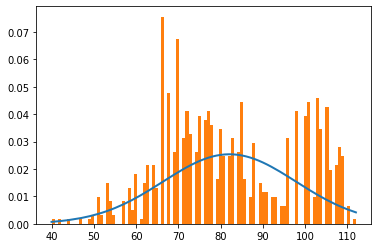

Skew = 0.10871801180935975


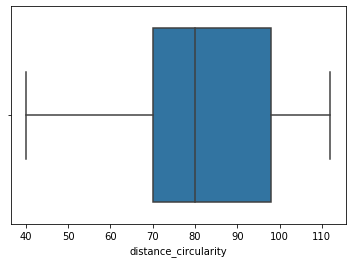

In [13]:

#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['distance_circularity'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 
sns.boxplot(data_vehicle_new['distance_circularity'])
print('Skew =', data_vehicle_new['distance_circularity'].skew())



There are no outliers in distance_circularity column but in distribution plot we can see that there are two peaks. Skewness is appromimately skewed

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


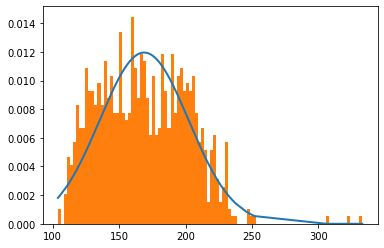

Skew = 0.3975716412698015


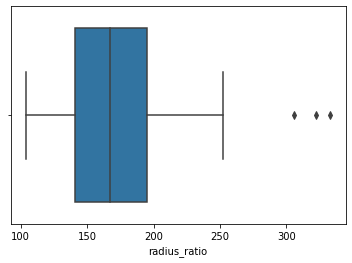

In [14]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['radius_ratio'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['radius_ratio'].skew())
sns.boxplot(data_vehicle_new['radius_ratio'])

There are outliers in radius_ratio column.
As per figure, it is right skewness because long tail is at the right side(mean>median)
Skewness values is 0.3975, which means it is approximately skewed

# Method to calculate outliers

In [15]:
#calculating interquartile range for finding outliers values
Q1 = data_vehicle_new.quantile(0.25)
Q3 = data_vehicle_new.quantile(0.75)
IQR = Q3 - Q1

In [16]:

#function to get the outliers on the specific columns
def get_outliers(datafr):
    out=[]
    Q1 = datafr.quantile(0.25)
    Q3 = datafr.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    for item in datafr:
        if((item<lower_bound) | (item>upper_bound)):
            out.append(item)
    return out

### Checking numbers of outliers in Radius_ratio column

In [17]:

#assigning the cyl column value to a new dataframe for finding outlier 
df_radius_ratio=data_vehicle_new['radius_ratio']
#calling the function to get outliers
radius_ratiooutliers=get_outliers(df_radius_ratio)
print("Total Number of outliers present in the radius_ratio column of the dataframe =", len(radius_ratiooutliers))
if len(radius_ratiooutliers)<=0:
  print("The outliers values that resides in the radius_ratio column are 0")
else:
    print("The outliers values that resides in the radius_ratio column are", radius_ratiooutliers)

Total Number of outliers present in the radius_ratio column of the dataframe = 3
The outliers values that resides in the radius_ratio column are [306.0, 322.0, 333.0]


### fixing outlier in radius_ratio column

In [18]:
for outlier in radius_ratiooutliers:
    data_vehicle_new.loc[(data_vehicle_new.radius_ratio == outlier),'radius_ratio']=data_vehicle['radius_ratio'].median()






### Checking visually if the outliers are removed from the radius_ratio column

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


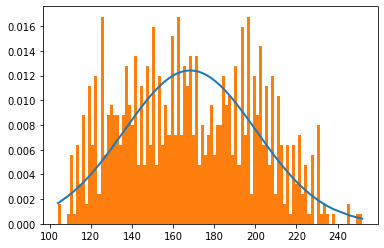

Skew = 0.1186803998444882


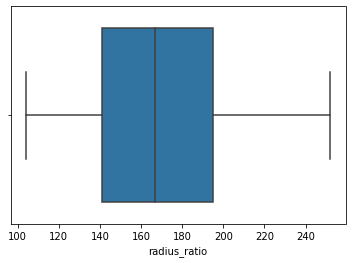

In [19]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['radius_ratio'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['radius_ratio'].skew())
sns.boxplot(data_vehicle_new['radius_ratio'])

Here, outlier has been handled in the radius_ratio column. with skewness is approximately symmetric

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


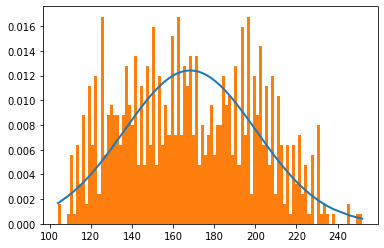

Skew = 0.1186803998444882


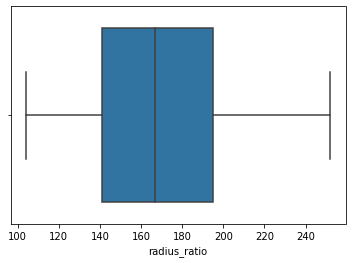

In [20]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['radius_ratio'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['radius_ratio'].skew())
sns.boxplot(data_vehicle_new['radius_ratio'])

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


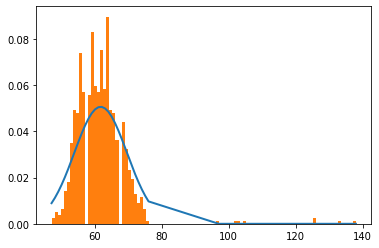

Skew = 3.8353916077858434


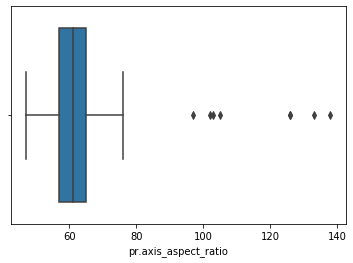

In [21]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['pr.axis_aspect_ratio'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['pr.axis_aspect_ratio'].skew())
sns.boxplot(data_vehicle_new['pr.axis_aspect_ratio'])

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


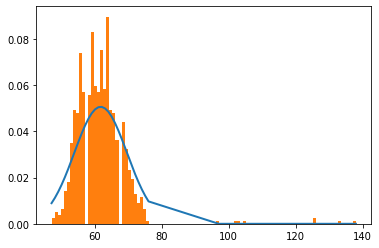

Skew = 3.8353916077858434


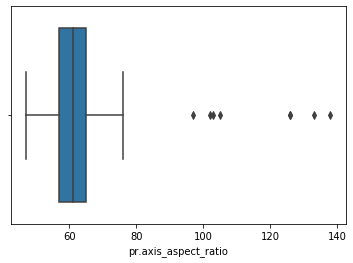

In [22]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['pr.axis_aspect_ratio'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['pr.axis_aspect_ratio'].skew())
sns.boxplot(data_vehicle_new['pr.axis_aspect_ratio'])

There are outliers in pr.axis_aspect_ratio column. It is right skewed because long tail is at right side(mean>median)
Skewness is 3.83 which means it is highly skewed

##### Checking number of Outliers for From above we can see that there are outliers in pr.axis_aspect_ratio

In [23]:

#assigning the cyl column value to a new dataframe for finding outlier 
df_axis_aspect_ratio=data_vehicle_new['pr.axis_aspect_ratio']
#calling the function to get outliers
axis_aspect_ratiooutliers=get_outliers(df_axis_aspect_ratio)
print("Total Number of outliers present in the pr.axis_aspect_ratio column of the dataframe =", len(axis_aspect_ratiooutliers))
if len(axis_aspect_ratiooutliers)<=0:
  print("The outliers values that resides in the pr.axis_aspect_ratio column are 0")
else:
    print("The outliers values that resides in the pr.axis_aspect_ratio column are", axis_aspect_ratiooutliers)

Total Number of outliers present in the pr.axis_aspect_ratio column of the dataframe = 8
The outliers values that resides in the pr.axis_aspect_ratio column are [103.0, 126.0, 126.0, 133.0, 102.0, 138.0, 97.0, 105.0]


### Fixing Outliers in the pr.axis_aspect_ratio column

In [24]:
for outlier in axis_aspect_ratiooutliers:
    data_vehicle_new.loc[(data_vehicle_new['pr.axis_aspect_ratio'] == outlier),'pr.axis_aspect_ratio']=data_vehicle['pr.axis_aspect_ratio'].median()


### Checking visually if the outliers have been removed

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


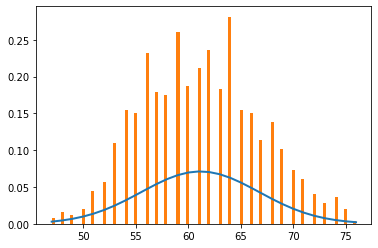

Skew = 0.16122307250748233


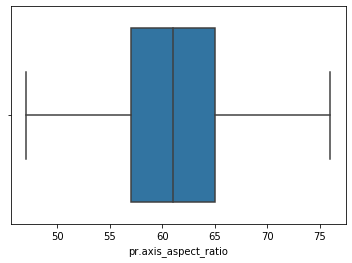

In [25]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['pr.axis_aspect_ratio'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['pr.axis_aspect_ratio'].skew())
sns.boxplot(data_vehicle_new['pr.axis_aspect_ratio'])

After removal of outliers, we see that it is normally distributed with skewness is approximately symmetric

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


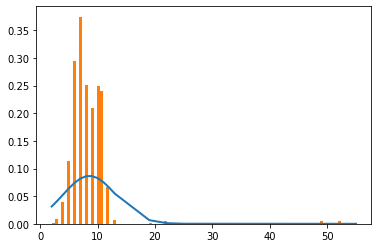

Skew = 6.7783936191089476


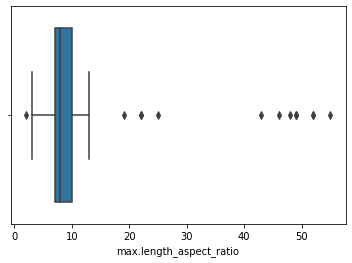

In [26]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['max.length_aspect_ratio'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['max.length_aspect_ratio'].skew())
sns.boxplot(data_vehicle_new['max.length_aspect_ratio'])

There are outliers in max.length_aspect_ratio. It is right skewed because long tail is at right side(mean>median)
Skewed value is 6.77 which means it is highly skewed

##### Checking number of outliers in max.length_aspect_ratio

In [27]:

#assigning the cyl column value to a new dataframe for finding outlier 
df_max_length_aspect_ratio=data_vehicle_new['max.length_aspect_ratio']
#calling the function to get outliers
max_length_aspect_ratiooutliers=get_outliers(df_max_length_aspect_ratio)
print("Total Number of outliers present in the max.length_aspect_ratio column of the dataframe =", len(max_length_aspect_ratiooutliers))
if len(max_length_aspect_ratiooutliers)<=0:
  print("The outliers values that resides in the max.length_aspect_ratio column are 0")
else:
    print("The outliers values that resides in the max.length_aspect_ratio column are", max_length_aspect_ratiooutliers)

Total Number of outliers present in the max.length_aspect_ratio column of the dataframe = 13
The outliers values that resides in the max.length_aspect_ratio column are [52, 49, 52, 22, 48, 43, 49, 25, 46, 19, 2, 55, 22]


### Fixing number of outliers in max.length_aspect_ratio column

In [28]:
for outlier in max_length_aspect_ratiooutliers:
    data_vehicle_new.loc[(data_vehicle_new['max.length_aspect_ratio'] == outlier),'max.length_aspect_ratio']=data_vehicle['max.length_aspect_ratio'].median()


### Visually checking if the outliers have been handled

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


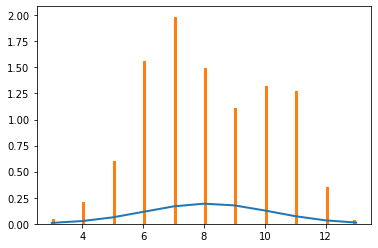

Skew = 0.09036662921530565


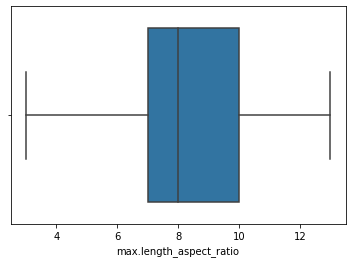

In [29]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['max.length_aspect_ratio'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['max.length_aspect_ratio'].skew())
sns.boxplot(data_vehicle_new['max.length_aspect_ratio'])

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


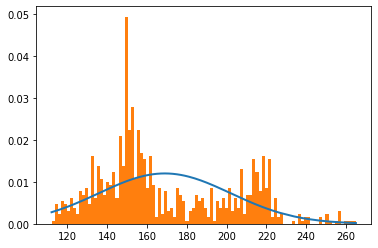

Skew = 0.6087097328672928


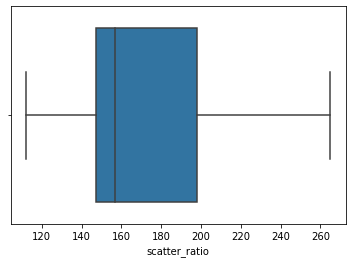

In [30]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['scatter_ratio'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['scatter_ratio'].skew())
sns.boxplot(data_vehicle_new['scatter_ratio'])

There are no outliers in scatter_ratio column. 
There are two peaks in distribution plot. It is right skewed because long tail is at right side(mean>median)
Skewness value is 0.60870 which means that it is moderately skewed.

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


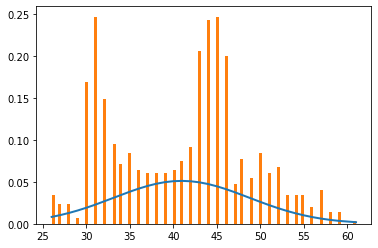

Skew = 0.046951051315584164


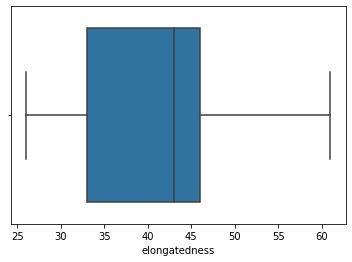

In [31]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['elongatedness'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['elongatedness'].skew())
sns.boxplot(data_vehicle_new['elongatedness'])

There are no outliers in elongatedness column. However, there are two peaks in distribution plot and it is left skewed because long tail is at left side(mean<median)
Skewness value is 0.04 which means that it is approximately symmetric.

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


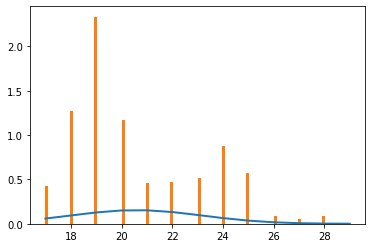

Skew = 0.7744056757899445


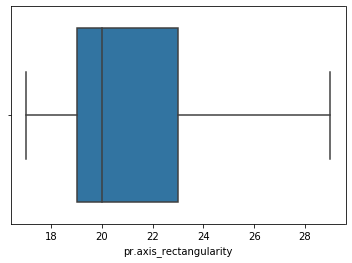

In [32]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['pr.axis_rectangularity'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['pr.axis_rectangularity'].skew())
sns.boxplot(data_vehicle_new['pr.axis_rectangularity'])

There are no outliers in pr.axis_rectangularity column It is right skewed because long tail is at right side(mean>median)
Skeweness value is 0.77 which means that it is moderately skewed.

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


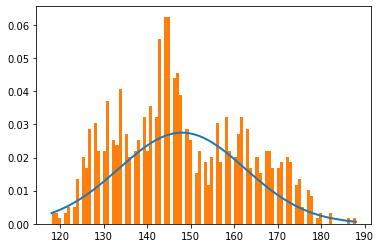

Skew = 0.2563591641353724


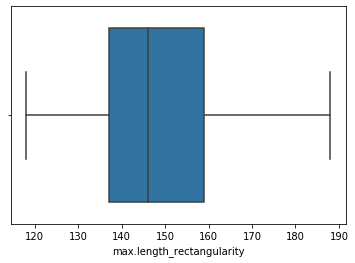

In [33]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['max.length_rectangularity'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['max.length_rectangularity'].skew())
sns.boxplot(data_vehicle_new['max.length_rectangularity'])

There are no outliers in max.length_rectangularity column.
Skewness value is 0.25, which means it is approximately symmetric

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


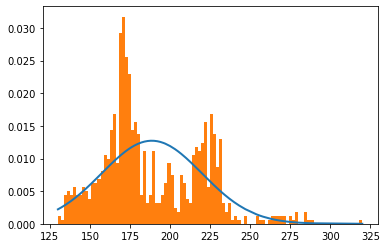

Skew = 0.6555976294220067


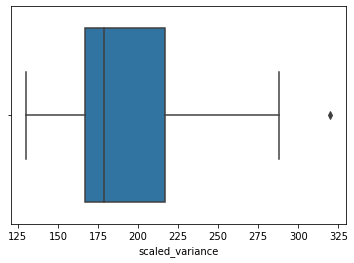

In [34]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['scaled_variance'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['scaled_variance'].skew())
sns.boxplot(data_vehicle_new['scaled_variance'])

There are outliers in scaled_variance column. As per figure, there are two peaks in distribution plot and it is right skewed because long tail is at right side(mean>median)
Skewness value is 0.65 which is approximately symmetric

##### Finding Outliers in scaled_variance column

In [35]:

#assigning the cyl column value to a new dataframe for finding outlier 
df_scaled_variance=data_vehicle_new['scaled_variance']
#calling the function to get outliers
scaled_varianceoutliers=get_outliers(df_scaled_variance)
print("Total Number of outliers present in the scaled_variance column of the dataframe =", len(scaled_varianceoutliers))
if len(max_length_aspect_ratiooutliers)<=0:
  print("The outliers values that resides in the scaled_variance column are 0")
else:
    print("The outliers values that resides in the scaled_variance column are", scaled_varianceoutliers)

Total Number of outliers present in the scaled_variance column of the dataframe = 1
The outliers values that resides in the scaled_variance column are [320.0]


### Fixing number of outliers in the scaled_variance column

In [36]:
for outlier in scaled_varianceoutliers:
    data_vehicle_new.loc[(data_vehicle_new['scaled_variance'] == outlier),'scaled_variance']=data_vehicle['scaled_variance'].median()


### Visually checking if the outlier is handled 

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


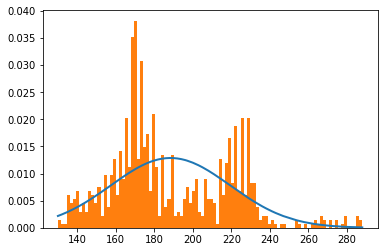

Skew = 0.6025567259905167


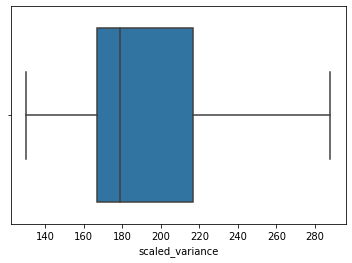

In [37]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['scaled_variance'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['scaled_variance'].skew())
sns.boxplot(data_vehicle_new['scaled_variance'])

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


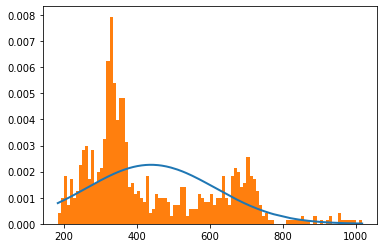

Skew = 0.8453454281630146


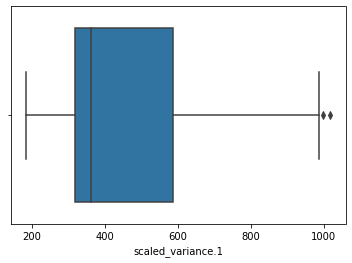

In [38]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['scaled_variance.1'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['scaled_variance.1'].skew())
sns.boxplot(data_vehicle_new['scaled_variance.1'])

There are outliers in scaled_variance.1 column. It is right skewed because long tail is at right side(mean>median)
It is moderately skewed.

##### Number of Outliers in scaled_Variance.1 column

In [39]:

#assigning the cyl column value to a new dataframe for finding outlier 
df_scaled_variance1=data_vehicle_new['scaled_variance.1']
#calling the function to get outliers
scaled_variance1outliers=get_outliers(df_scaled_variance1)
print("Total Number of outliers present in the scaled_variance.1 column of the dataframe =", len(scaled_variance1outliers))
if len(max_length_aspect_ratiooutliers)<=0:
  print("The outliers values that resides in the scaled_variance.1 column are 0")
else:
    print("The outliers values that resides in the scaled_variance.1 column are", scaled_variance1outliers)

Total Number of outliers present in the scaled_variance.1 column of the dataframe = 2
The outliers values that resides in the scaled_variance.1 column are [998.0, 1018.0]


### Fixing number of outliers in the scaled_variance.1 column

In [40]:
for outlier in scaled_variance1outliers:
    data_vehicle_new.loc[(data_vehicle_new['scaled_variance.1'] == outlier),'scaled_variance.1']=data_vehicle['scaled_variance.1'].median()


### Visually checking if the outliers are handled 

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


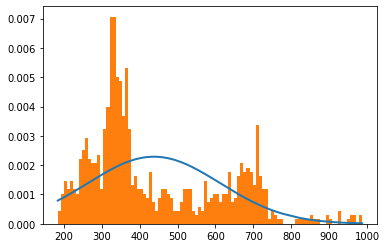

Skew = 0.8206851235699437


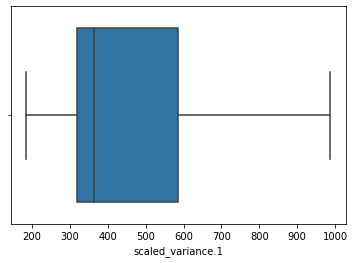

In [41]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['scaled_variance.1'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['scaled_variance.1'].skew())
sns.boxplot(data_vehicle_new['scaled_variance.1'])

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


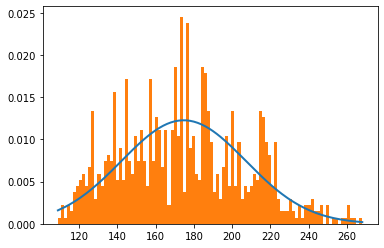

Skew = 0.27990964799345835


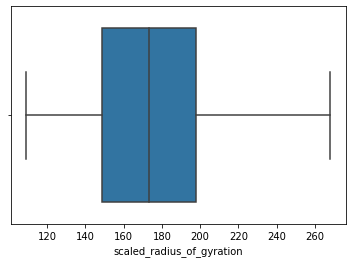

In [42]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['scaled_radius_of_gyration'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['scaled_radius_of_gyration'].skew())
sns.boxplot(data_vehicle_new['scaled_radius_of_gyration'])

There are no outliers present in the scaled_radius_of_gyration column. It is approximately skewed. normally distributed

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


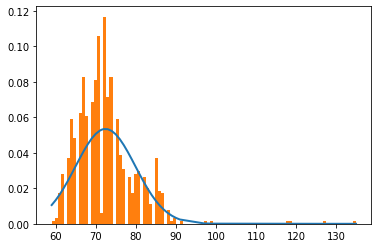

Skew = 2.0899787533912066


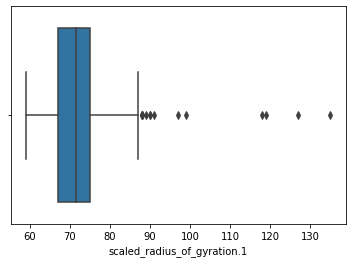

In [43]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['scaled_radius_of_gyration.1'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['scaled_radius_of_gyration.1'].skew())
sns.boxplot(data_vehicle_new['scaled_radius_of_gyration.1'])

There are number of outliers present in the scaled_radius_of_gyration.1. 
It is right skewed as tail is to the right with mean>median
skew value is 2.08997 which means that it is highly skewed

##### Checking number of outliers in the scaled_radius_of_gyration.1 column

In [44]:

#assigning the cyl column value to a new dataframe for finding outlier 
df_scaled_radius_of_gyration=data_vehicle_new['scaled_radius_of_gyration.1']
#calling the function to get outliers
scaled_radius_of_gyration1outliers=get_outliers(df_scaled_radius_of_gyration)
print("Total Number of outliers present in the scaled_radius_of_gyration.1  column of the dataframe =", len(scaled_radius_of_gyration1outliers))
if len(scaled_radius_of_gyration1outliers)<=0:
  print("The outliers values that resides in the scaled_radius_of_gyration.1  column are 0")
else:
    print("The outliers values that resides in the scaled_radius_of_gyration.1  column are", scaled_radius_of_gyration1outliers)

Total Number of outliers present in the scaled_radius_of_gyration.1  column of the dataframe = 15
The outliers values that resides in the scaled_radius_of_gyration.1  column are [127.0, 118.0, 88.0, 88.0, 119.0, 97.0, 89.0, 90.0, 88.0, 135.0, 88.0, 91.0, 90.0, 99.0, 88.0]


### Finding outliers in scaled_radius_of_gyration.1 column

In [45]:
for outlier in scaled_radius_of_gyration1outliers:
    data_vehicle_new.loc[(data_vehicle_new['scaled_radius_of_gyration.1'] == outlier),'scaled_radius_of_gyration.1']=data_vehicle['scaled_radius_of_gyration.1'].median()


### visually checking if the outliers are handled 

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


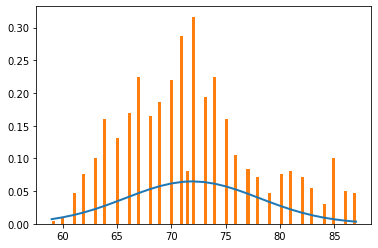

Skew = 0.5350565125214641


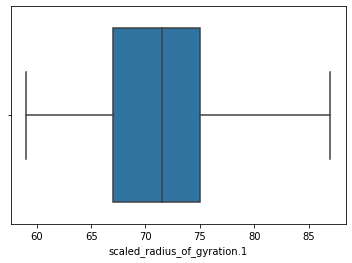

In [46]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['scaled_radius_of_gyration.1'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['scaled_radius_of_gyration.1'].skew())
sns.boxplot(data_vehicle_new['scaled_radius_of_gyration.1'])

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


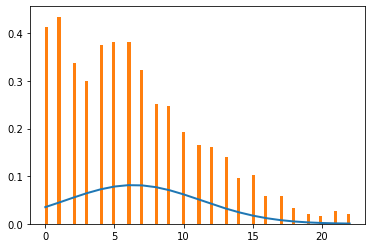

Skew = 0.7808132397211246


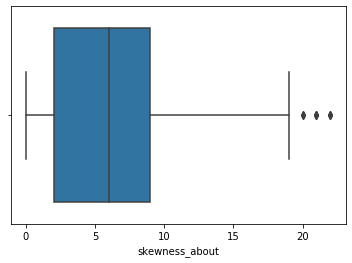

In [47]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['skewness_about'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['skewness_about'].skew())
sns.boxplot(data_vehicle_new['skewness_about'])

There are outliers preset in the skewness_about column. 
It is right skewed as tail is to the right.
Skewed value is 0.78 which means it is moderately skwed

##### Checking number of outliers preset in the skewness_about column

In [48]:

#assigning the cyl column value to a new dataframe for finding outlier 
df_skewness_about=data_vehicle_new['skewness_about']
#calling the function to get outliers
skewness_aboutoutliers=get_outliers(df_skewness_about)
print("Total Number of outliers present in the skewness_about column of the dataframe =", len(skewness_aboutoutliers))
if len(skewness_aboutoutliers)<=0:
  print("The outliers values that resides in the skewness_about column are 0")
else:
    print("The outliers values that resides in the skewness_about column are", skewness_aboutoutliers)

Total Number of outliers present in the skewness_about column of the dataframe = 12
The outliers values that resides in the skewness_about column are [20.0, 21.0, 22.0, 20.0, 21.0, 21.0, 21.0, 22.0, 22.0, 22.0, 20.0, 21.0]


### Fixing number of outliers in the skewness_about column

In [49]:
for outlier in skewness_aboutoutliers:
    data_vehicle_new.loc[(data_vehicle_new['skewness_about'] == outlier),'skewness_about']=data_vehicle['skewness_about'].median()


### Visually checking if the outliers are handled

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


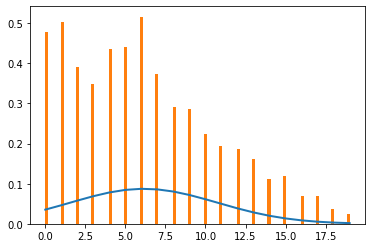

Skew = 0.6245900496233223


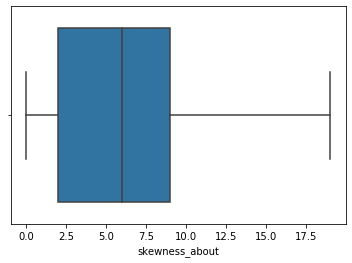

In [50]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['skewness_about'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['skewness_about'].skew())
sns.boxplot(data_vehicle_new['skewness_about'])

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


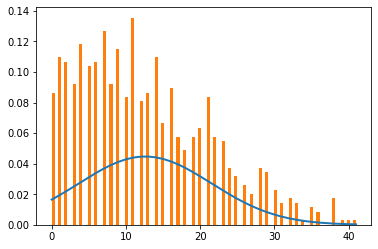

Skew = 0.6890143067342678


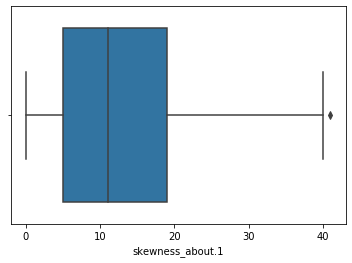

In [51]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['skewness_about.1'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['skewness_about.1'].skew())
sns.boxplot(data_vehicle_new['skewness_about.1'])

There are outliers present in the skewness_about.1 column.
Since the tail is to the right, it is right skewed
Skewed value is 0.68 which means it is moderately skewed.

##### Checking number of outliers in the skewness_about.1 column

In [52]:

#assigning the cyl column value to a new dataframe for finding outlier 
df_skewness_about1=data_vehicle_new['skewness_about.1']
#calling the function to get outliers
skewness_about1outliers=get_outliers(df_skewness_about1)
print("Total Number of outliers present in the skewness_about.1 column of the dataframe =", len(skewness_about1outliers))
if len(skewness_about1outliers)<=0:
  print("The outliers values that resides in the skewness_about.1 column are 0")
else:
    print("The outliers values that resides in the skewness_about.1 column are", skewness_about1outliers)

Total Number of outliers present in the skewness_about.1 column of the dataframe = 1
The outliers values that resides in the skewness_about.1 column are [41.0]


In [53]:
for outlier in skewness_about1outliers:
    data_vehicle_new.loc[(data_vehicle_new['skewness_about.1'] == outlier),'skewness_about.1']=data_vehicle['skewness_about.1'].median()


### Visually checking if the outliers have been handled

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


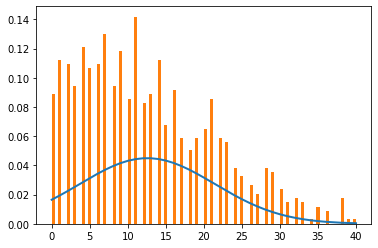

Skew = 0.674714654723636


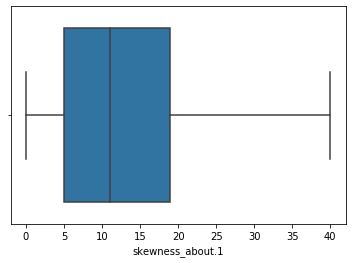

In [54]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['skewness_about.1'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['skewness_about.1'].skew())
sns.boxplot(data_vehicle_new['skewness_about.1'])

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


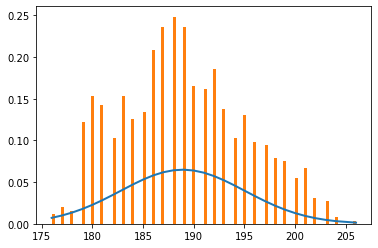

Skew = 0.24998506992542593


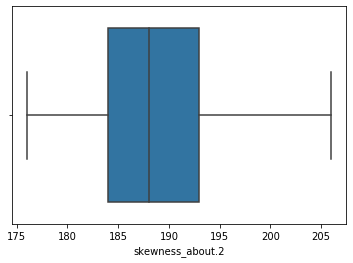

In [55]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['skewness_about.2'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['skewness_about.2'].skew())
sns.boxplot(data_vehicle_new['skewness_about.2'])

There are no outliers in the column skewness_about.2 column. 
Skewed value is 0.24998 which means approximately symmetric.


C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


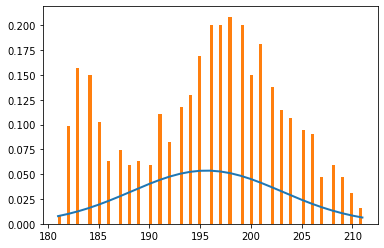

Skew = -0.22634128032982512


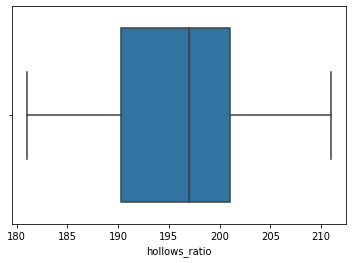

In [56]:
#convert vehicle data DataFrame object to numpy array and sort
numpydf = np.asarray(data_vehicle_new['hollows_ratio'])
numpydf = sorted(numpydf)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(numpydf, np.mean(numpydf), np.std(numpydf)) 

#plot both series on the histogram
plt.plot(numpydf ,fit,'-',linewidth = 2)
plt.hist(numpydf, normed=True, bins = 100)      
plt.show() 

print('Skew =', data_vehicle_new['hollows_ratio'].skew())
sns.boxplot(data_vehicle_new['hollows_ratio'])

There are no outliers in hollows_ratio column
It is left skewed because long tail is at left side(mean<median)
It is approximately symmetric

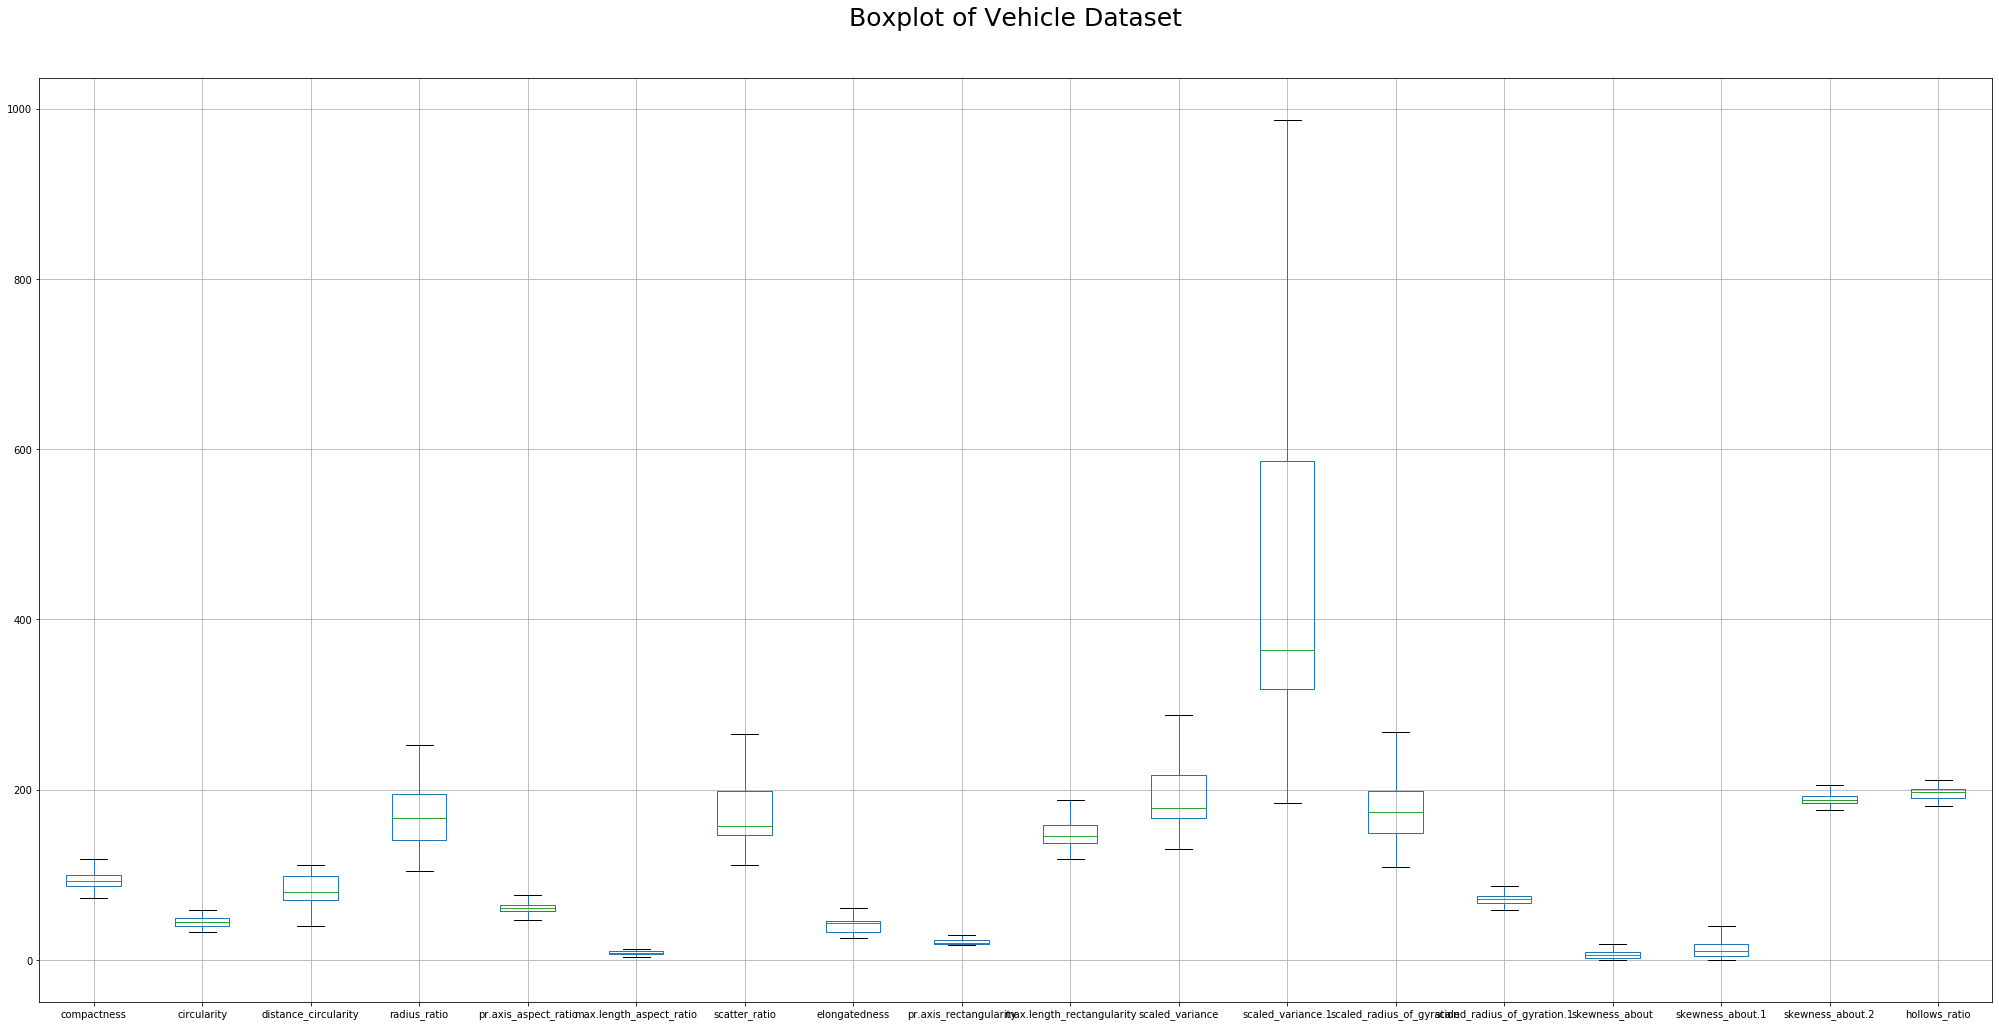

In [57]:
colormap = plt.cm.plasma
plt.figure(figsize=(35,17))
plt.title('Boxplot of Vehicle Dataset', y=1.05, size=25)
data_vehicle_new.boxplot()

### Five point analysis after EDA

In [58]:
data_vehicle_new.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.330969   32.147908  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.154846    5.613458   47.0   57.00   
max.length_aspect_ratio      846.0    8.118203    2.064114    3.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.430260   31.034232  130.0  167.00   
scaled_variance.1            846.0  437.790780  174.346065  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   71.943853    6.158852   59.0   67.00   
skewness_about               846.0    6.147754    4.572950    0.0    2.00   
skewness_about.1             846.0   12.565012    8.877465    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%    max  
compactness                   93.0  100.00  119.0  
circularity                   44.0   49.00   59.0  
distance_circularity          80.0   98.00  112.0  
radius_ratio                 167.0  194.75  252.0  
pr.axis_aspect_ratio          61.0   65.00   76.0  
max.length_aspect_ratio        8.0   10.00   13.0  
scatter_ratio                157.0  198.00  265.0  
elongatedness                 43.0   46.00   61.0  
pr.axis_rectangularity        20.0   23.00   29.0  
max.length_rectangularity    146.0  159.00  188.0  
scaled_variance              179.0  216.75  288.0  
scaled_variance.1            363.5  586.00  987.0  
scaled_radius_of_gyration    173.5  198.00  268.0  
scaled_radius_of_gyration.1   71.5   75.00   87.0  
skewness_about                 6.0    9.00   19.0  
skewness_about.1              11.0   19.00   40.0  
skewness_about.2             188.0  193.00  206.0  
hollows_ratio                197.0  201.00  211.0

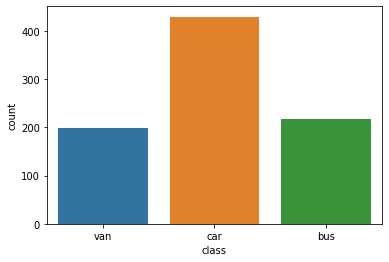

In [59]:
sns.countplot(data_vehicle_new['class'])
plt.show()

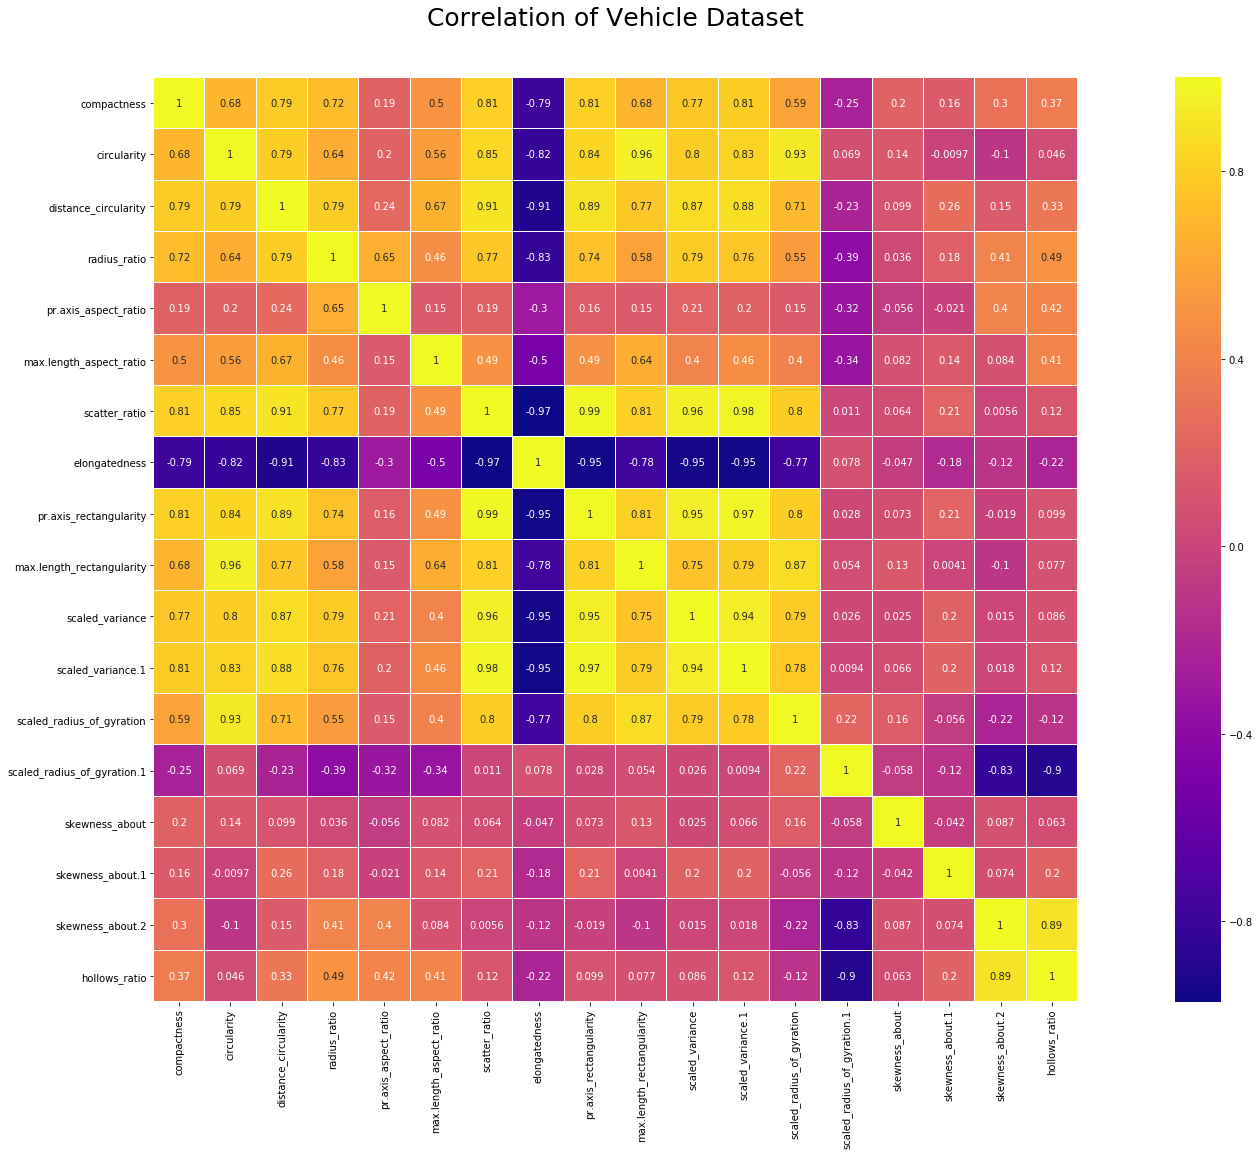

In [60]:
colormap = plt.cm.plasma
plt.figure(figsize=(35,17))
plt.title('Correlation of Vehicle Dataset', y=1.05, size=25)
sns.heatmap(data_vehicle_new.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, 
            linecolor='white', annot=True)

1. Scaled Variance & Scaled Variance.1 seems to be strongly correlated with value of 0.94
2. Skewness_about_2 and hollow_ratio seems to be strongly correlated, corr coeff: 0.89
3. Distance_circularity and radius_ratio seems to have high positive correlation with corr coeff: 0.79
4. compactness & circularity , radius_ratio & pr.axis_aspect_ratio also seems ver averagely correlated with coeff: 0.67.
5. Scaled _variance and scaled_radius_of_gyration, circularity & distance_circularity also seems to be highly correlated with corr coeff: 0.79
6. pr.axis_rectangularity and max.length_recatangularity also seems to be strongly correlated with coeff: 0.81 
7. scatter_ratio and elongatedness seems to be have strong negative correlation val : 0.97
8. elongatedness and pr.axis_rectangularity seems to have strong negative correlation, val:  0.95

LITTLE TO NO VARIANCE

      -max_length_aspect_ratio & radius_ratio have average correlation with coeff: 0.5
      - pr.axis_aspect_ratio & max_length_aspect_ratio seems to have very little correlation
      - scaled_radius_gyration & scaled_radisu_gyration.1 seems to be very little correlated
      - scaled_radius_gyration.1 & skewness_about seems to be very little correlated
      - skewness_about & skewness_about.1 not be correlated
      - skewness_about.1 and skewness_about.2 are not correlated.

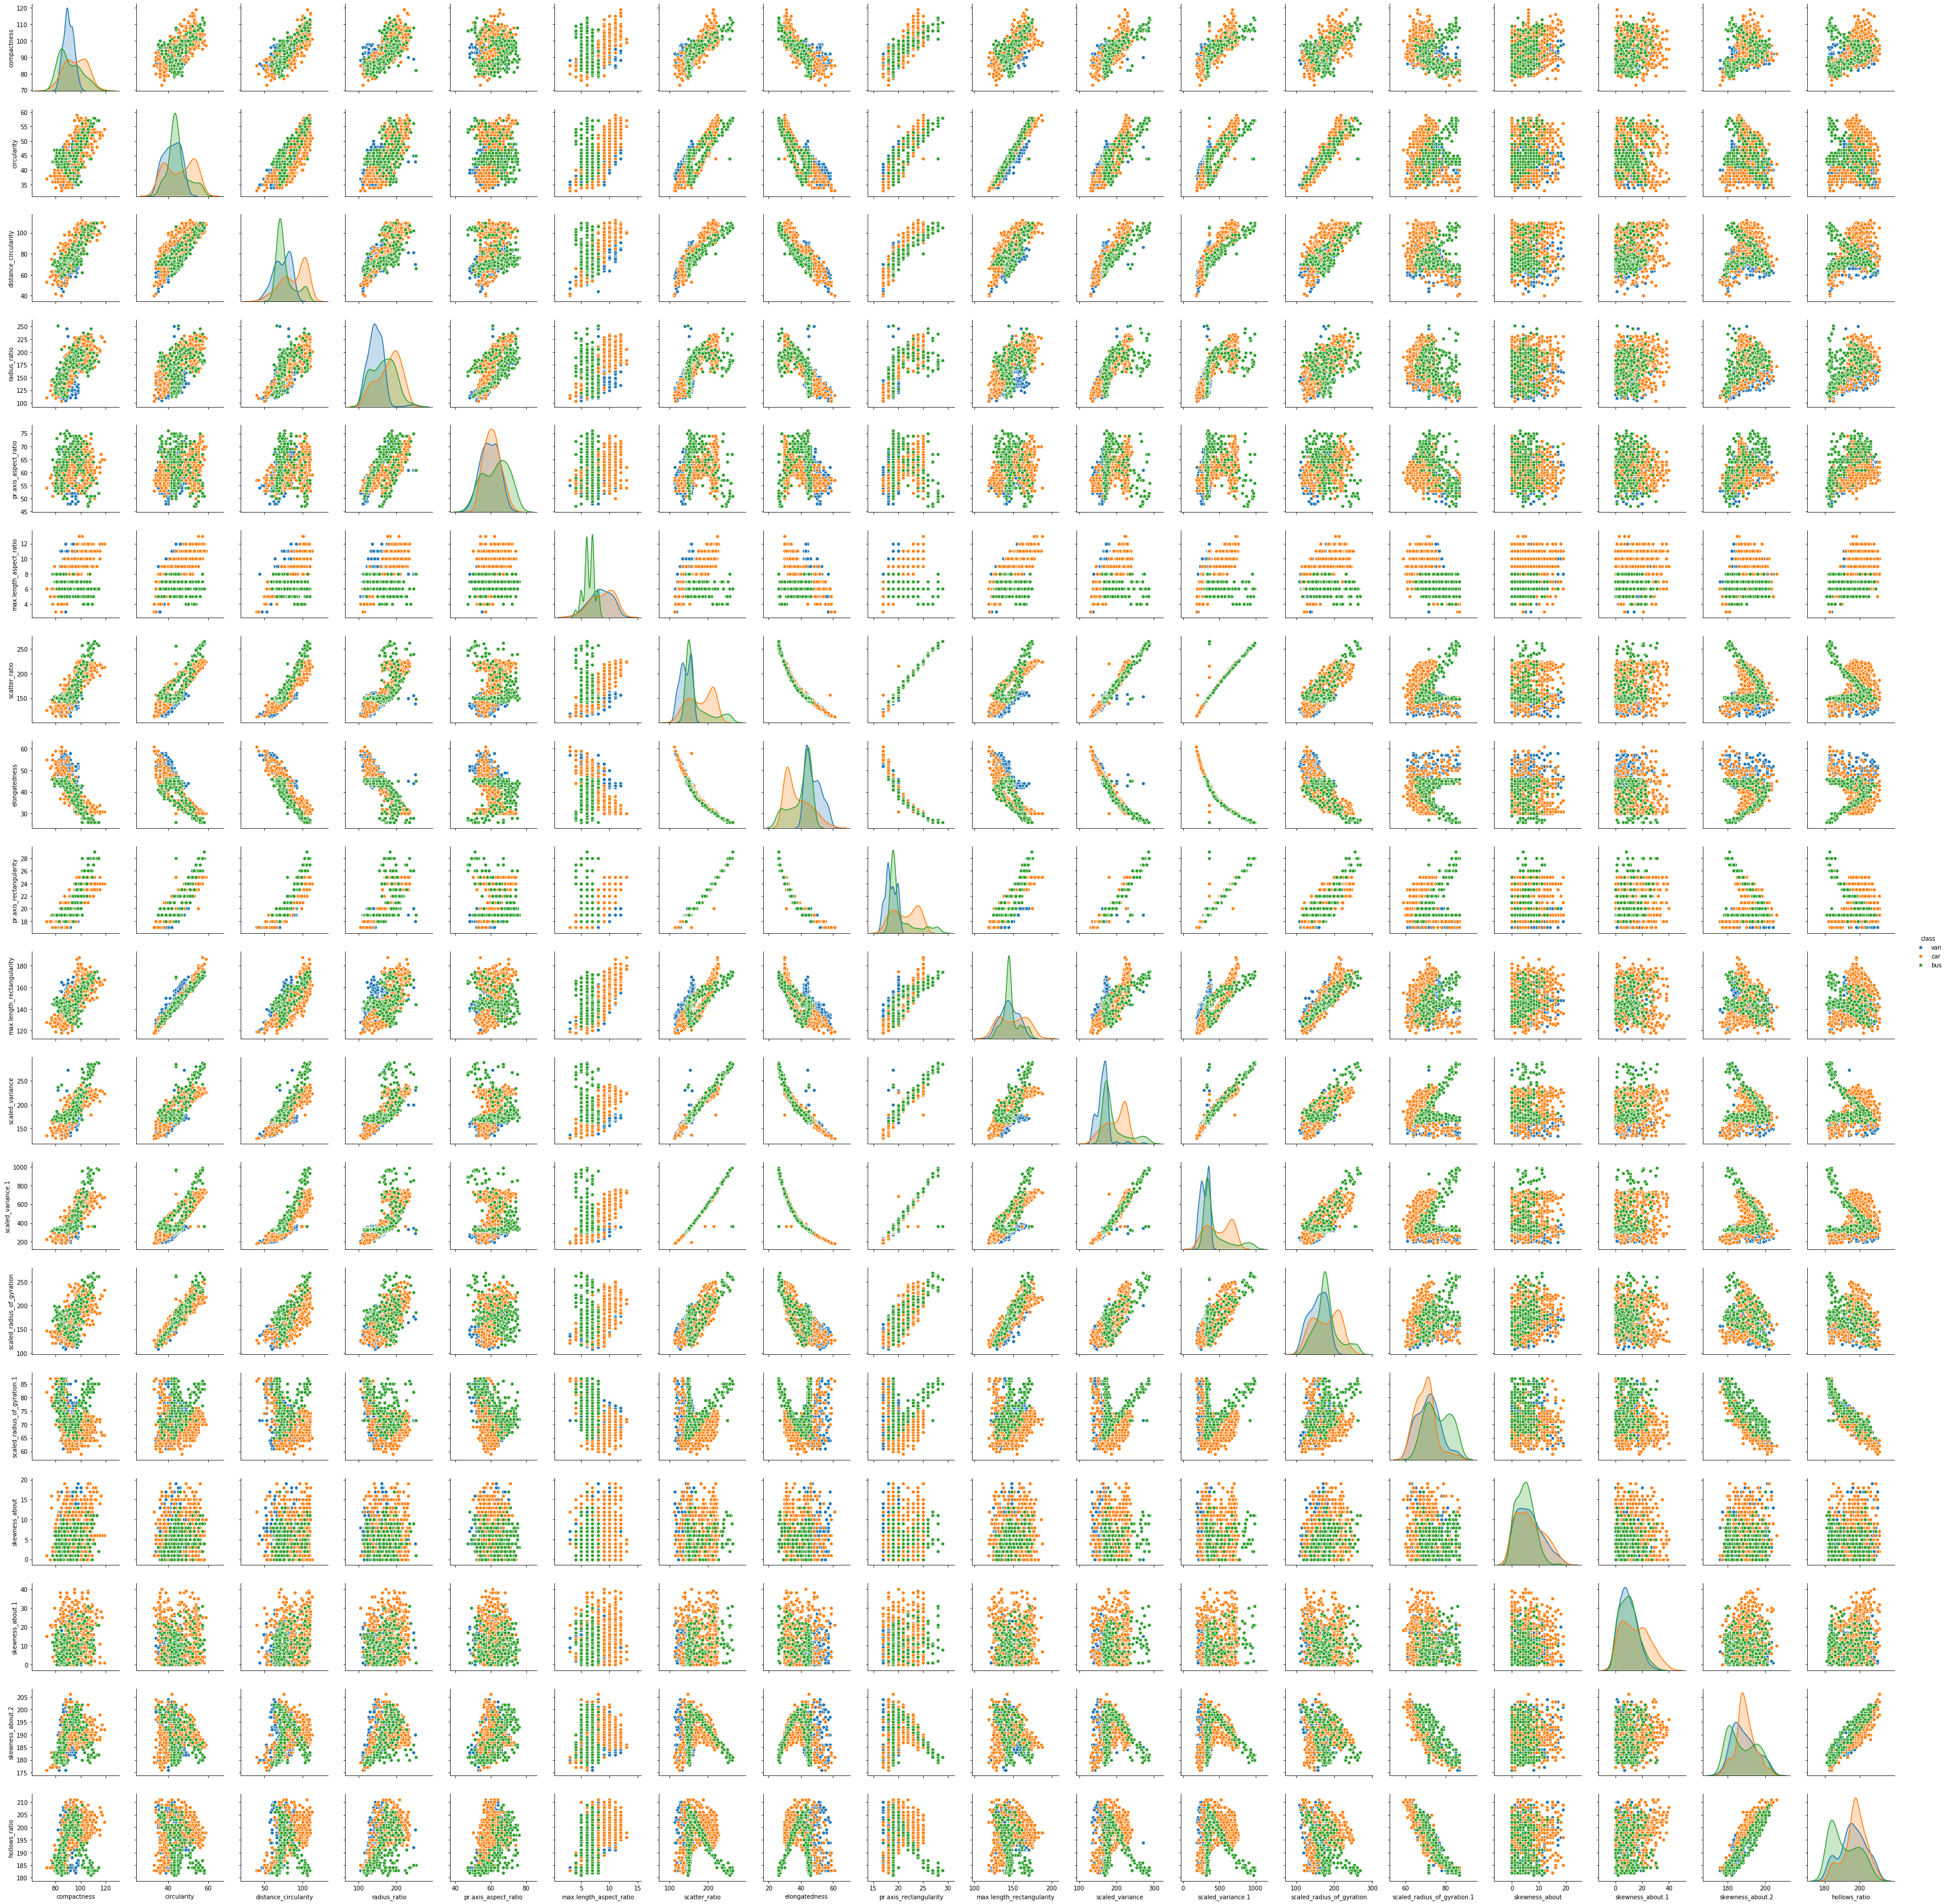

In [61]:
sns.pairplot(data_vehicle_new, diag_kind='kde', hue='class')

As observed in our correlation heatmap our pairplot seems to validate the same. Scaled Variance & Scaled Variance.1 seems to be have very strong positive correlation with value of 0.94. skewness_about_2 and hollow_ratio also seems to have strong positive correation with coeff: 0.89

scatter_ratio and elongatedness seems to be have very strong negative correlation. elongatedness and pr.axis_rectangularity seems to have strong negative correlation with val of

We found from our pairplot analysis that, Scaled Variance & Scaled Variance.1 and elongatedness and pr.axis_rectangularity to be strongly correlated , so they need to dropped of treated carefully before we go for model building.

In [62]:
X = data_vehicle_new[data_vehicle_new.columns[1:-1]]
y = data_vehicle_new[["class"]]


In [63]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00118343  0.79325751  0.63903532  0.20349327  0.5611334   0.8489411
  -0.82244387  0.84439802  0.96245572  0.80371846  0.82844154  0.92691166
   0.06882659  0.13651201 -0.00967793 -0.10455005  0.04640562]
 [ 0.79325751  1.00118343  0.79516215  0.24462154  0.66759792  0.90614687
  -0.9123854   0.89408198  0.77544391  0.87061349  0.88498924  0.70660663
  -0.22962442  0.09922417  0.26265581  0.14627113  0.33312625]
 [ 0.63903532  0.79516215  1.00118343  0.65132393  0.46450748  0.77085211
  -0.82636872  0.74502008  0.58015378  0.78711387  0.76115704  0.55142559
  -0.39092105  0.03579728  0.17981316  0.40632957  0.49234013]
 [ 0.20349327  0.24462154  0.65132393  1.00118343  0.15047265  0.19442484
  -0.29849719  0.16323988  0.14776643  0.20734569  0.19663295  0.14876723
  -0.32144977 -0.05609621 -0.02111342  0.401356    0.41622574]
 [ 0.5611334   0.66759792  0.46450748  0.15047265  1.00118343  0.49133933
  -0.50477756  0.48850876  0.64347365  0.40186618  0.46379685

In [64]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-3.00849174e-01 -1.20123541e-01 -2.07203161e-01 -3.47914602e-03
  -1.21537498e-01 -5.90441946e-02 -3.98730836e-01 -2.69828839e-02
   1.81378620e-01 -6.82155012e-03 -1.53722806e-01 -5.14685057e-02
  -8.57576233e-02  6.94004977e-01 -2.04938340e-01 -2.86716799e-01
   4.14119458e-02]
 [-3.13603327e-01  5.81645295e-02  6.64882976e-02  1.24707561e-01
  -5.78516672e-02  1.61252149e-02  2.11714469e-01 -2.27114268e-01
  -3.72147230e-01 -4.07088074e-01 -6.30582856e-01  3.36274592e-03
   2.20591047e-01 -1.25696209e-02  1.37028335e-01 -8.50863113e-02
  -3.98907103e-02]
 [-2.78535968e-01  2.10542834e-01  3.70724650e-02 -2.47795402e-01
   1.40028779e-01 -1.22458656e-01  1.74817397e-01 -2.35561670e-01
   2.08665381e-01  5.34521890e-01 -8.53210398e-02 -5.58010796e-04
   3.65700927e-01 -2.02247311e-01 -2.00829103e-01 -3.73650047e-01
  -5.94574156e-02]
 [-1.02685116e-01  2.67884580e-01 -1.05947458e-01 -5.88583834e-01
   1.37715731e-01 -6.19709009e-01  3.28989465e-02  9.39586320e-02
 

In [65]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.049051633105561, array([-0.30084917, -0.31360333, -0.27853597, -0.10268512, -0.20243355,
       -0.32254354,  0.32132456, -0.31893286, -0.29087508, -0.31186217,
       -0.31713056, -0.27745357,  0.03671096, -0.03372804, -0.06036686,
       -0.03065696, -0.08091359])), (3.3246974994230527, array([-0.12012354,  0.05816453,  0.21054283,  0.26788458,  0.11725498,
       -0.06446156,  0.00101487, -0.07733409, -0.11138931, -0.06637835,
       -0.06104387, -0.19987372, -0.50692181,  0.0128473 ,  0.09587   ,
        0.5027758 ,  0.51245713])), (1.1912923357103462, array([-0.20720316,  0.0664883 ,  0.03707247, -0.10594746, -0.13978227,
        0.10842288, -0.08465639,  0.10742023, -0.21519845,  0.1399337 ,
        0.10965551, -0.21091685,  0.06940237, -0.52501801,  0.69411914,
       -0.0623182 , -0.03871566])), (1.1162594266551502, array([-3.47914602e-03,  1.24707561e-01, -2.47795402e-01, -5.88583834e-01,
        3.42734477e-01, -1.32078360e-04,  6.44429633e-02,  2.41185568e-02,
        8.

In [66]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
print("Cumulative variance", cum_var_exp)




Cumulative variance [0.53166796 0.72700723 0.79700042 0.86258512 0.91377339 0.95067517
 0.96904661 0.97785363 0.98279375 0.98714659 0.99094659 0.99336994
 0.9953487  0.99708556 0.99851746 0.99969292 1.        ]


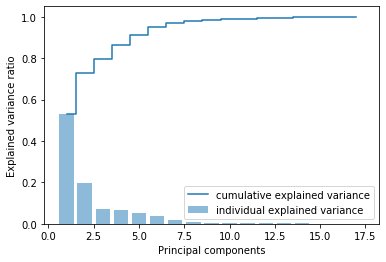

In [67]:
plt.bar(range(1,18), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,18),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [68]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:7])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

In [69]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y, test_size=test_size, random_state=seed)

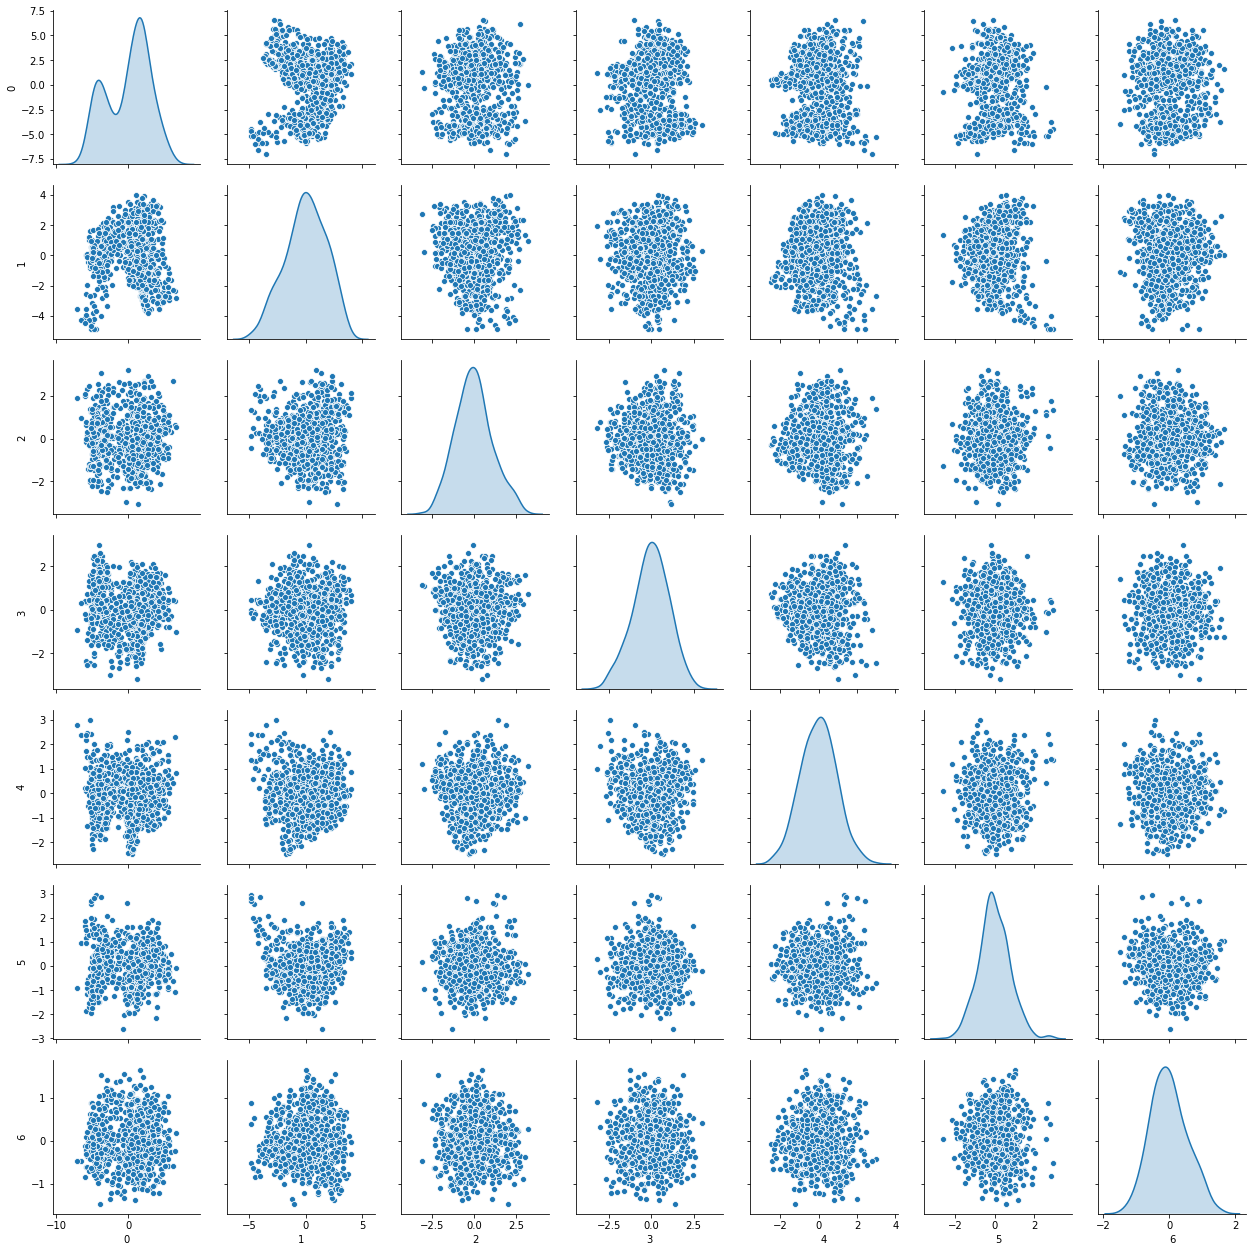

In [70]:
#Let us check it visually


sns.pairplot(Proj_data_df, diag_kind='kde') 

In [71]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=seed)

model = svm.SVC(C=.01, kernel='linear')
#Hyper Parameters Set
params = {'C': [0.05, 0.01, 0.5, 1],
          'kernel': ['linear', 'rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
cross_val_score(model1, X, y)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test)) 

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The def

Best Hyper Parameters: {'C': 0.01, 'kernel': 'linear'}
Accuracy: 0.9212598425196851
Confusion Metrix:
 [[ 58   7   2]
 [  8 120   3]
 [  0   0  56]]


C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0)) 

C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataC

[0.89411765 0.94117647 0.95294118 0.95294118 0.95294118 0.95294118
 0.95238095 0.94047619 0.95238095 0.96428571]
Accuracy: 94.566% (1.831%)


C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\himansh.negi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
